In [1]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)] 
PCSE version: 5.5.5


In [16]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join('data', 'crop', 'c.crop')
cropd = CABOFileReader(cropfile)

In [18]:
soilfile = os.path.join('data', 'soil', 's.soil')
soild = CABOFileReader(soilfile)

In [19]:
from pcse.util import WOFOST72SiteDataProvider
sited = WOFOST72SiteDataProvider(WAV=10, CO2=360)
print(sited)

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360}
{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 10.0, 'SMLIM': 0.4}


In [20]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

In [21]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join('data', 'agro', 'sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-10-20
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2006-04-05
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar-beet-601
    StateEvents: null
    TimedEvents: null



In [29]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherfile = os.path.join('data', 'meteo', 'nl1.xlsx')
wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Netherlands
Station: Wageningen, Location Haarweg
Description: Observed data from Station Haarweg in Wageningen
Source: Meteorology and Air Quality Group, Wageningen University
Contact: Peter Uithol
----Site characteristics----
Elevation:    7.0
Latitude:  51.970
Longitude:  5.670
Data available for 2004-01-02 - 2008-12-31
Number of missing days: 0



In [31]:
from pcse.models import Wofost72_WLP_FD, Wofost72_PP
wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)

In [37]:
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2006-10-16,2.0,1.048787,21557.705173,14410.185356,3408.824045,3738.695772,2805.686837,0.052878,120.0,0.283340,34.000845
2006-10-17,2.0,1.055901,21628.846417,14474.212476,3412.381108,3742.252834,2807.138699,0.030516,120.0,0.282876,33.945161
2006-10-18,2.0,1.049414,21658.771700,14501.145230,3413.877372,3743.749098,2807.749419,0.030184,120.0,0.284605,34.152545
2006-10-19,2.0,1.052133,21685.964928,14525.619135,3415.237033,3745.108759,2808.304383,0.043053,120.0,0.284840,34.180768
2006-10-20,2.0,1.043584,21717.141971,14553.678474,3416.795885,3746.667611,2808.940650,0.039061,120.0,0.284271,34.112520


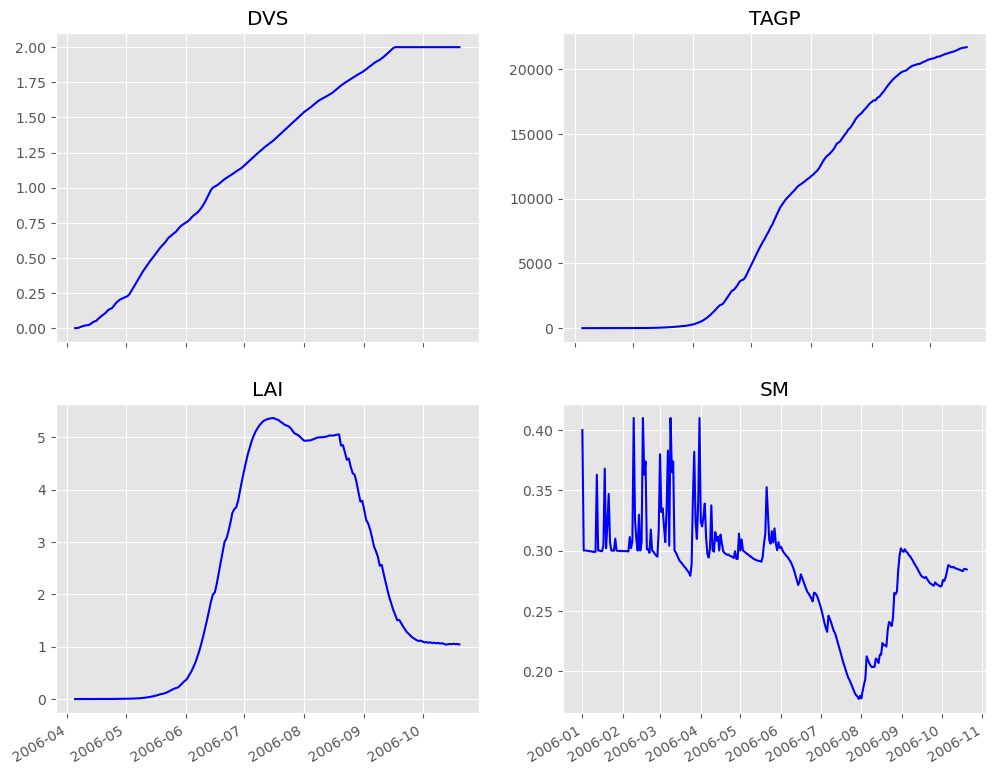

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()

In [41]:
from pcse.fileinput import PCSEFileReader
from pcse.base import ParameterProvider
crop = PCSEFileReader(os.path.join(data_dir, "crop", "c.crop"))
soil = PCSEFileReader(os.path.join(data_dir, "soil", "s.soil"))
site = PCSEFileReader(os.path.join(data_dir, "site", "siteparam.site"))
parameterprovider = ParameterProvider(soildata=soil, cropdata=crop, sitedata=site)

In [42]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherdataprovider = ExcelWeatherDataProvider(os.path.join(data_dir, "meteo", "nl1.xls"))
print(weatherdataprovider)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Netherlands
Station: Wageningen, Location Haarweg
Description: Observed data from Station Haarweg in Wageningen
Source: Meteorology and Air Quality Group, Wageningen University
Contact: Peter Uithol
----Site characteristics----
Elevation:    7.0
Latitude:  51.970
Longitude:  5.670
Data available for 2004-01-02 - 2008-12-31
Number of missing days: 0



In [44]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement = YAMLAgroManagementReader(os.path.join(data_dir, "agro", "sugarbeet_calendar.agro"))
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-08-20
      crop_end_type: earliest
      crop_name: wheat
      crop_start_date: 2006-03-31
      crop_start_type: emergence
      max_duration: 300
      variety_name: spring-wheat-1
    StateEvents: null
    TimedEvents:
    - comment: All nitrogen amounts in g N m-2
      event_signal: apply_n
      events_table:
      - 2006-04-10:
          amount: 10
          recovery: 0.7
      - 2006-05-05:
          amount: 5
          recovery: 0.7
      name: Nitrogen application table



In [45]:
from pcse.models import LINTUL3
lintul3 = LINTUL3(parameterprovider, weatherdataprovider, agromanagement)

In [49]:
lintul3.run_till_terminate()
output = lintul3.get_output()
df = pd.DataFrame(output).set_index("day")
df.tail()

,DVS,TGROWTH,LAI,NUPTT,TRAN,TIRRIG,TNSOIL,TRAIN,TRANRF,TRUNOF,TAGBM,TTRAN,WC,WLVD,WLVG,WRT,WSO,WST
day,,,,,,,,,,,,,,,,,,
2006-07-28,1.931748,626.055845,0.384372,4.705364,0.0,0.0,6.984636,375.4,0.0,0.0,560.215659,71.142134,0.198576,88.549063,17.687187,16.649864,184.992749,268.986661
2006-07-29,1.953592,626.055845,0.368403,4.705364,0.0,0.0,6.994636,376.3,0.0,0.0,560.215659,71.142134,0.197346,89.285040,16.951210,16.150368,184.992749,268.986661
2006-07-30,1.974029,626.055845,0.353714,4.705364,0.0,0.0,7.004636,376.3,0.0,0.0,560.215659,71.142134,0.196293,89.962501,16.273749,15.665857,184.992749,268.986661
2006-07-31,1.995291,626.055845,0.339132,4.705364,0.0,0.0,7.014636,381.6,0.0,0.0,560.215659,71.142134,0.198484,90.635453,15.600797,15.195881,184.992749,268.986661
2006-08-01,2.000000,626.055845,0.326168,4.705364,0.0,0.0,7.024636,381.7,0.0,0.0,560.215659,71.142134,0.197384,91.234076,15.002174,14.740005,184.992749,268.986661


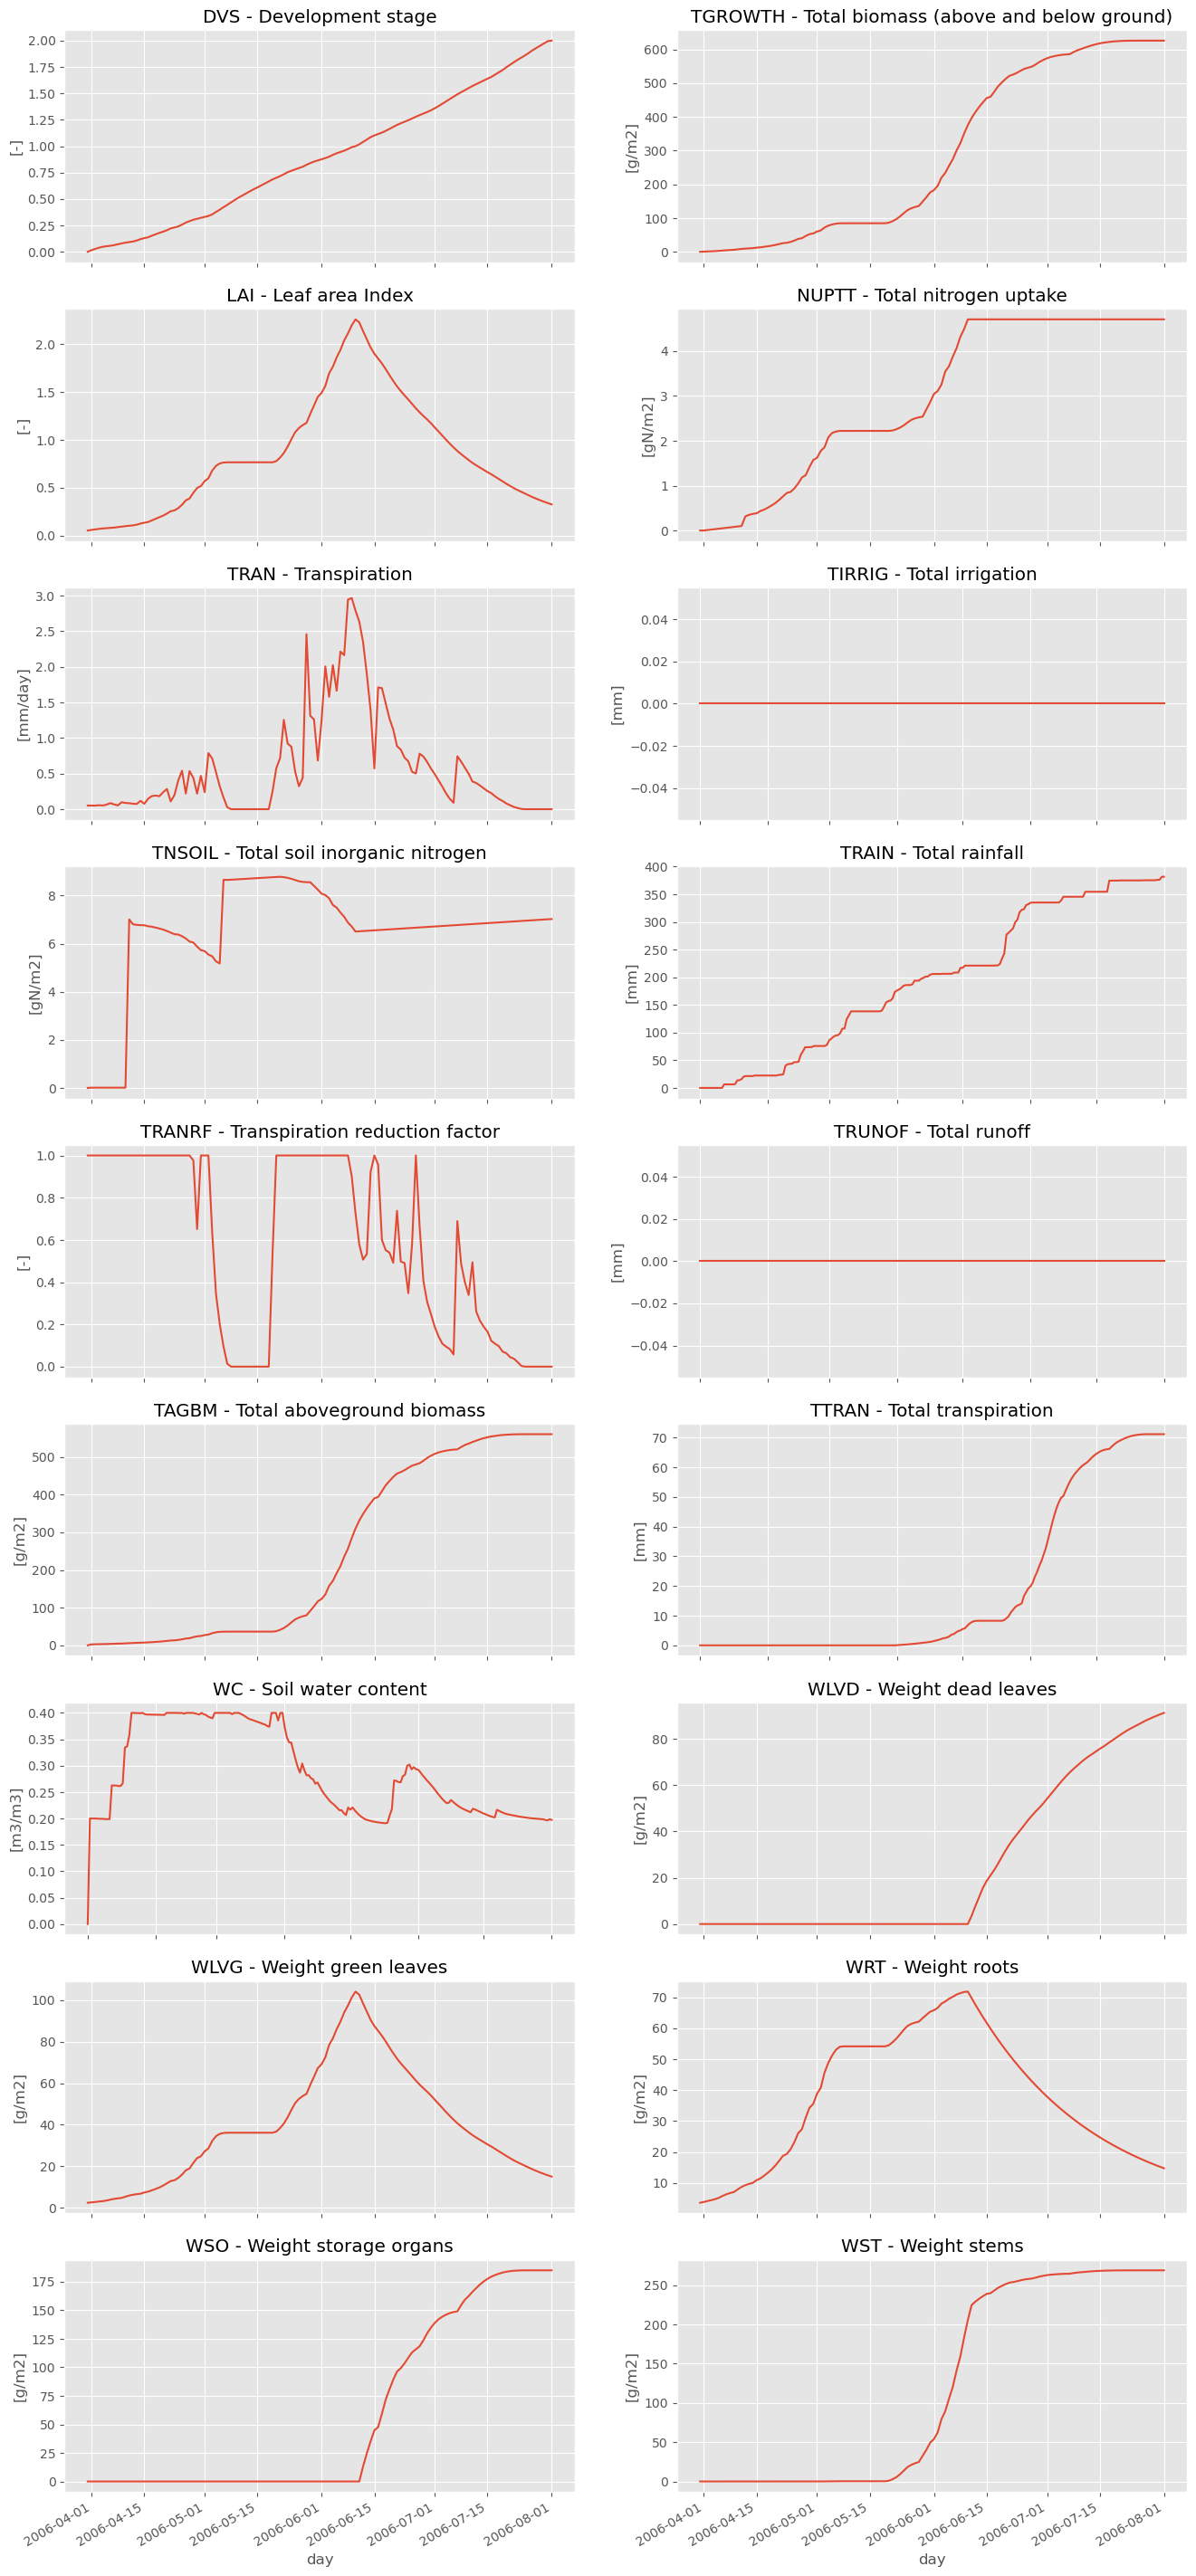

In [50]:
titles = {"DVS":("Development stage", "-"),
          "TGROWTH": ("Total biomass (above and below ground)", "g/m2"),
          "LAI": ("Leaf area Index", "-"),
          "NUPTT": ("Total nitrogen uptake", "gN/m2"),
          "TRAN": ("Transpiration", "mm/day"),
          "TIRRIG": ("Total irrigation", "mm"),
          "TNSOIL": ("Total soil inorganic nitrogen", "gN/m2"),
          "TRAIN": ("Total rainfall", "mm"),
          "TRANRF": ("Transpiration reduction factor", "-"),
          "TRUNOF": ("Total runoff", "mm"),
          "TAGBM": ("Total aboveground biomass", "g/m2"),
          "TTRAN": ("Total transpiration", "mm"),
          "WC": ("Soil water content", "m3/m3"),
          "WLVD": ("Weight dead leaves", "g/m2"),
          "WLVG": ("Weight green leaves", "g/m2"),
          "WRT": ("Weight roots", "g/m2"),
          "WSO": ("Weight storage organs", "g/m2"),
          "WST": ("Weight stems", "g/m2")
         }
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(16,40))
for key, axis in zip(df.columns, axes.flatten()):
    name, unit = titles[key]
    title = f"{key} - {name}"
    df[key].plot(ax=axis, title=title)
    axis.set_ylabel(f"[{unit}]")
fig.autofmt_xdate()